In [201]:
#=====================================================
# Nome:   Diego Andrés Méndez
# N. USP: 7991531
#=====================================================

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MAC0460/5832 - Lista 3: Redes Neurais - MNIST

### Data de Entrega: a definir!

##### Classificação de dígitos
Os dataset para esta tarefa foi tirado da competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, mas os dados estão inalterados. Cada linha (amostra) do arquivo contém 785 colunas: a primeira informa o label da amostra e as outras 784 são os valores dos pixels da imagem (28 x 28) que representa o dígito.



# Questão 1

Projete uma rede neural para resolver o problema de classificação de dígitos. Baixe o arquivo train.csv.gz (link acima) e dezipe-o para a pasta data/. Verifique que as células abaixo executam com sucesso e exibem o resultado esperado. Utilize os pacotes de python tensorflow (https://www.tensorflow.org/), theano (http://deeplearning.net/software/theano/) ou PyTorch (https://pytorch.org/) para implementar sua rede neural. Escolha o que preferir/tiver mais familiaridade - ou o quiser passar a ter mais familiaridade :) - para definir sua rede neural. Usem a arquitetura 3-layer NN 300+100 hidden units (erro 3.05%), como descrito no site http://yann.lecun.com/exdb/mnist/index.html.


Façam os três seguintes experimentos:

1. Imagem original.
2. Imagem amostrada com passo 1, isto é, reduz a imagem para 1/4 do número total de pixels.
3. Imagem amostrada com passo 2, isto é, reduz a imagem para 1/16 do número total de pixels.


Em cada experimento, execute os seguintes procedimentos:
1. Compute a curva experimental de aprendizado (N = 5000, N = 10000, N = 15000, ... N = 35000), estimar o $E_{out}$ a partir das 7000 amostras não usadas.
2. Para N = 35000 (isto é, separe 7000 amostras para validação), calcule o valor da precisão $\epsilon = E_{out} - E_{in}$.
3. Adote o valor de $\epsilon$ calculado em 2; repita dez vezes o experimento de aprendizado para $N = 35000$ e 7000 amostras de validação (em cada experimento, escolha aleatoriamente entre as 42000 amostras 7000 para formar o conjunto de validação e as restantes para treinamento); calcule o $E_{out}$ para cada um dos experimentos; a partir dos $E_{out}$ calculados, estime o valor do parâmetro $\delta$.
4. Comente os resultados obtidos.

Adote *learning rate* $\eta = 0.001$.
Para o item 3, lembre da equação $P(|E_{out}(h_{opt}) - E_{in}(h_{opt})| < \epsilon) > 1 - \delta$.

In [3]:
data = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1).astype(np.dtype('uint8'))
print(data.shape)

(42000, 785)


Label:  1


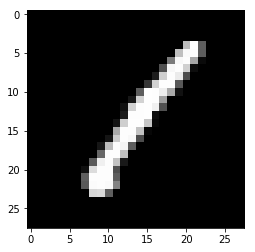

Label:  0


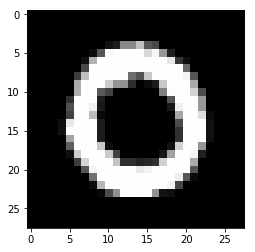

Label:  8


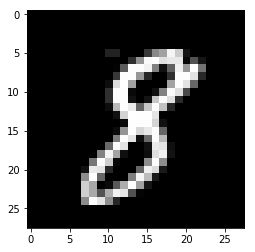

In [4]:
sample = data[0]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

sample = data[1]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

sample = data[20]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

In [82]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.utils import to_categorical

from sklearn.utils import shuffle

import pandas as pd

from skimage.transform import rescale

In [83]:
index=pd.MultiIndex(levels=[[],[]],labels=[[],[]],names=['Training size','Pixel reduction factor'])
df=pd.DataFrame(columns=['E_in','E_out'],index=index)

In [84]:
reduce_size=lambda image,factor:rescale(image.reshape(28,28),factor, mode='reflect',multichannel=False,anti_aliasing=False).flatten()
sgd=keras.optimizers.SGD(lr=0.001)
batch_size=32
loss='categorical_crossentropy'

In [85]:
x=np.array([np.array(sample[1:]) for sample in data])
y=to_categorical(np.array([sample[0] for sample in data]),num_classes=10)

x_rand, y_rand = shuffle(x, y, random_state=0)

In [86]:
for train_size in [5000,10000,15000,20000,25000,30000,35000]:

    x_train=x_rand[:train_size]
    x_test=x_rand[-7000:]
    y_train=y_rand[:train_size]
    y_test=y_rand[-7000:]
    
    l2=keras.regularizers.l2(0.1)
    
    dnn=Sequential()
    dnn.add(layers.Dense(units=300,input_dim=784,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=100,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=10,activation='softmax',kernel_regularizer=l2))

    dnn.compile(loss=loss,optimizer=sgd,metrics=['accuracy'])

    dnn.fit(x_train,y_train,epochs=50,verbose=2,batch_size=batch_size)
    
    df.loc[(train_size,1),:]=[1-dnn.evaluate(x_train, y_train, batch_size=32)[1],1-dnn.evaluate(x_test, y_test, batch_size=32)[1]]

Epoch 1/50
 - 2s - loss: 69.6299 - acc: 0.2862
Epoch 2/50
 - 2s - loss: 65.0448 - acc: 0.3580
Epoch 3/50
 - 1s - loss: 61.5345 - acc: 0.3706
Epoch 4/50
 - 2s - loss: 58.3637 - acc: 0.3760
Epoch 5/50
 - 1s - loss: 55.3403 - acc: 0.3808
Epoch 6/50
 - 1s - loss: 51.5143 - acc: 0.4450
Epoch 7/50
 - 1s - loss: 48.5991 - acc: 0.4682
Epoch 8/50
 - 1s - loss: 46.0811 - acc: 0.4730
Epoch 9/50
 - 1s - loss: 43.7071 - acc: 0.4804
Epoch 10/50
 - 1s - loss: 41.5557 - acc: 0.4798
Epoch 11/50
 - 1s - loss: 39.4801 - acc: 0.4826
Epoch 12/50
 - 1s - loss: 35.6808 - acc: 0.5740
Epoch 13/50
 - 1s - loss: 31.5610 - acc: 0.7090
Epoch 14/50
 - 1s - loss: 26.9189 - acc: 0.8818
Epoch 15/50
 - 1s - loss: 24.7222 - acc: 0.9368
Epoch 16/50
 - 1s - loss: 23.0520 - acc: 0.9566
Epoch 17/50
 - 1s - loss: 21.5485 - acc: 0.9738
Epoch 18/50
 - 1s - loss: 20.1941 - acc: 0.9870
Epoch 19/50
 - 1s - loss: 18.9470 - acc: 0.9912
Epoch 20/50
 - 1s - loss: 17.7824 - acc: 0.9960
Epoch 21/50
 - 2s - loss: 16.6960 - acc: 0.9974
E

 - 6s - loss: 1.2964 - acc: 0.9710
Epoch 18/50
 - 5s - loss: 1.0886 - acc: 0.9713
Epoch 19/50
 - 4s - loss: 0.9268 - acc: 0.9712
Epoch 20/50
 - 4s - loss: 0.7996 - acc: 0.9710
Epoch 21/50
 - 5s - loss: 0.6997 - acc: 0.9719
Epoch 22/50
 - 5s - loss: 0.6213 - acc: 0.9709
Epoch 23/50
 - 5s - loss: 0.5606 - acc: 0.9714
Epoch 24/50
 - 4s - loss: 0.5125 - acc: 0.9716
Epoch 25/50
 - 5s - loss: 0.4745 - acc: 0.9718
Epoch 26/50
 - 4s - loss: 0.4442 - acc: 0.9729
Epoch 27/50
 - 4s - loss: 0.4212 - acc: 0.9724
Epoch 28/50
 - 5s - loss: 0.4024 - acc: 0.9732
Epoch 29/50
 - 6s - loss: 0.3871 - acc: 0.9741
Epoch 30/50
 - 5s - loss: 0.3754 - acc: 0.9755
Epoch 31/50
 - 5s - loss: 0.3663 - acc: 0.9734
Epoch 32/50
 - 5s - loss: 0.3585 - acc: 0.9738
Epoch 33/50
 - 4s - loss: 0.3530 - acc: 0.9750
Epoch 34/50
 - 5s - loss: 0.3476 - acc: 0.9760
Epoch 35/50
 - 4s - loss: 0.3444 - acc: 0.9752
Epoch 36/50
 - 5s - loss: 0.3413 - acc: 0.9750
Epoch 37/50
 - 4s - loss: 0.3382 - acc: 0.9756
Epoch 38/50
 - 4s - loss:

Epoch 34/50
 - 9s - loss: 0.3298 - acc: 0.9732
Epoch 35/50
 - 8s - loss: 0.3293 - acc: 0.9734
Epoch 36/50
 - 10s - loss: 0.3292 - acc: 0.9732
Epoch 37/50
 - 9s - loss: 0.3289 - acc: 0.9725
Epoch 38/50
 - 10s - loss: 0.3287 - acc: 0.9739
Epoch 39/50
 - 11s - loss: 0.3285 - acc: 0.9737
Epoch 40/50
 - 7s - loss: 0.3282 - acc: 0.9735
Epoch 41/50
 - 8s - loss: 0.3282 - acc: 0.9733
Epoch 42/50
 - 7s - loss: 0.3275 - acc: 0.9732
Epoch 43/50
 - 7s - loss: 0.3276 - acc: 0.9737
Epoch 44/50
 - 6s - loss: 0.3275 - acc: 0.9739
Epoch 45/50
 - 7s - loss: 0.3275 - acc: 0.9735
Epoch 46/50
 - 7s - loss: 0.3268 - acc: 0.9743
Epoch 47/50
 - 6s - loss: 0.3270 - acc: 0.9740
Epoch 48/50
 - 7s - loss: 0.3270 - acc: 0.9743
Epoch 49/50
 - 7s - loss: 0.3266 - acc: 0.9734
Epoch 50/50
 - 7s - loss: 0.3263 - acc: 0.9733
7000/7000 [==============================] - 1s 78us/step


In [87]:
df

,,E_in,E_out
Training size,Pixel reduction factor,,
5000,1,0.0036,0.0634286
10000,1,0.0147,0.0464286
15000,1,0.0196,0.0415714
20000,1,0.02045,0.037
25000,1,0.02108,0.0362857
30000,1,0.0219667,0.0348571
35000,1,0.0219143,0.0354286


In [88]:
x=np.array([reduce_size(np.array(sample[1:]),0.5) for sample in data])
y=keras.utils.to_categorical(np.array([sample[0] for sample in data]),num_classes=10)

x_rand, y_rand = shuffle(x, y, random_state=0)

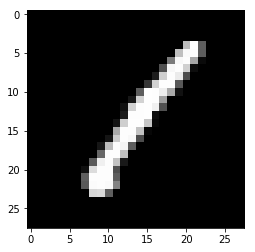

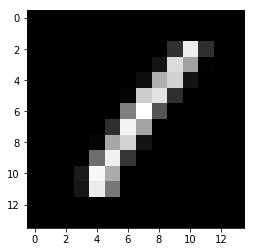

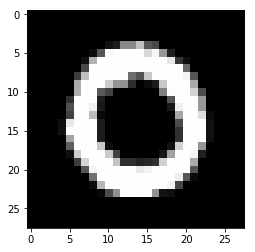

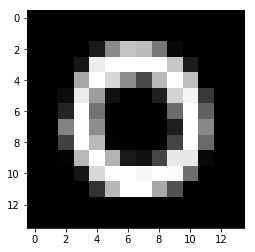

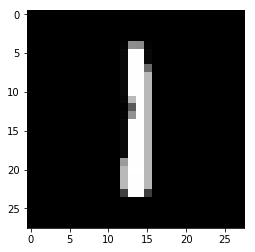

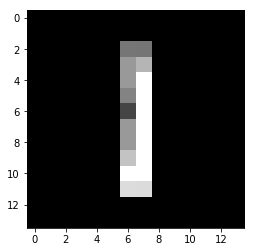

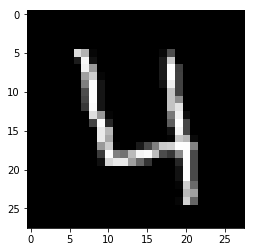

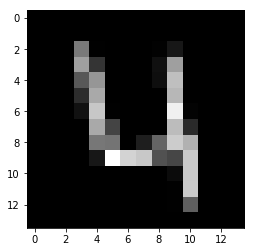

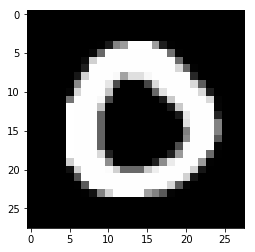

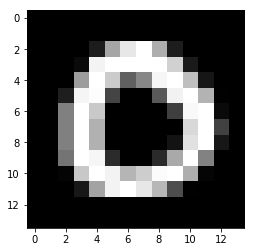

In [89]:
for i in range(5):
    plt.imshow(data[i][1:].reshape((28,28)), cmap='gray')
    plt.show()
    plt.imshow(x[i].reshape((14,14)), cmap='gray')
    plt.show()

In [90]:
for train_size in [5000,10000,15000,20000,25000,30000,35000]:

    x_train=x_rand[:train_size]
    x_test=x_rand[-7000:]
    y_train=y_rand[:train_size]
    y_test=y_rand[-7000:]

    l2=keras.regularizers.l2(0.01)
    
    dnn=Sequential()
    dnn.add(layers.Dense(units=300,input_dim=196,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=100,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=10,activation='softmax',kernel_regularizer=l2))

    dnn.compile(loss=loss,optimizer=sgd,metrics=['accuracy'])

    dnn.fit(x_train,y_train,epochs=100,verbose=2,batch_size=batch_size)
    
    df.loc[(train_size,4),:]=[1-dnn.evaluate(x_train, y_train, batch_size=32)[1],1-dnn.evaluate(x_test, y_test, batch_size=32)[1]]

Epoch 1/100
 - 1s - loss: 6.2869 - acc: 0.1028
Epoch 2/100
 - 1s - loss: 6.2286 - acc: 0.1696
Epoch 3/100
 - 1s - loss: 6.1709 - acc: 0.2638
Epoch 4/100
 - 0s - loss: 6.1136 - acc: 0.3632
Epoch 5/100
 - 0s - loss: 6.0567 - acc: 0.4502
Epoch 6/100
 - 0s - loss: 5.9998 - acc: 0.5040
Epoch 7/100
 - 0s - loss: 5.9425 - acc: 0.5460
Epoch 8/100
 - 1s - loss: 5.8850 - acc: 0.5722
Epoch 9/100
 - 0s - loss: 5.8271 - acc: 0.5974
Epoch 10/100
 - 1s - loss: 5.7688 - acc: 0.6184
Epoch 11/100
 - 1s - loss: 5.7100 - acc: 0.6348
Epoch 12/100
 - 1s - loss: 5.6506 - acc: 0.6482
Epoch 13/100
 - 1s - loss: 5.5907 - acc: 0.6626
Epoch 14/100
 - 1s - loss: 5.5303 - acc: 0.6690
Epoch 15/100
 - 1s - loss: 5.4696 - acc: 0.6804
Epoch 16/100
 - 1s - loss: 5.4087 - acc: 0.6828
Epoch 17/100
 - 1s - loss: 5.3482 - acc: 0.6900
Epoch 18/100
 - 1s - loss: 5.2880 - acc: 0.6952
Epoch 19/100
 - 0s - loss: 5.2282 - acc: 0.7014
Epoch 20/100
 - 1s - loss: 5.1691 - acc: 0.7056
Epoch 21/100
 - 1s - loss: 5.1109 - acc: 0.7098
E

Epoch 70/100
 - 2s - loss: 2.6096 - acc: 0.8826
Epoch 71/100
 - 1s - loss: 2.5889 - acc: 0.8833
Epoch 72/100
 - 2s - loss: 2.5685 - acc: 0.8840
Epoch 73/100
 - 1s - loss: 2.5483 - acc: 0.8843
Epoch 74/100
 - 1s - loss: 2.5285 - acc: 0.8852
Epoch 75/100
 - 1s - loss: 2.5089 - acc: 0.8852
Epoch 76/100
 - 1s - loss: 2.4895 - acc: 0.8855
Epoch 77/100
 - 2s - loss: 2.4704 - acc: 0.8856
Epoch 78/100
 - 2s - loss: 2.4516 - acc: 0.8866
Epoch 79/100
 - 1s - loss: 2.4330 - acc: 0.8867
Epoch 80/100
 - 2s - loss: 2.4148 - acc: 0.8868
Epoch 81/100
 - 2s - loss: 2.3966 - acc: 0.8873
Epoch 82/100
 - 2s - loss: 2.3789 - acc: 0.8878
Epoch 83/100
 - 2s - loss: 2.3613 - acc: 0.8877
Epoch 84/100
 - 1s - loss: 2.3439 - acc: 0.8885
Epoch 85/100
 - 1s - loss: 2.3268 - acc: 0.8885
Epoch 86/100
 - 1s - loss: 2.3099 - acc: 0.8892
Epoch 87/100
 - 2s - loss: 2.2933 - acc: 0.8890
Epoch 88/100
 - 1s - loss: 2.2768 - acc: 0.8892
Epoch 89/100
 - 1s - loss: 2.2605 - acc: 0.8892
Epoch 90/100
 - 1s - loss: 2.2445 - acc:

 - 3s - loss: 2.5747 - acc: 0.8806
Epoch 37/100
 - 3s - loss: 2.5349 - acc: 0.8803
Epoch 38/100
 - 3s - loss: 2.4961 - acc: 0.8811
Epoch 39/100
 - 2s - loss: 2.4585 - acc: 0.8819
Epoch 40/100
 - 2s - loss: 2.4217 - acc: 0.8823
Epoch 41/100
 - 2s - loss: 2.3859 - acc: 0.8828
Epoch 42/100
 - 2s - loss: 2.3511 - acc: 0.8834
Epoch 43/100
 - 2s - loss: 2.3172 - acc: 0.8842
Epoch 44/100
 - 2s - loss: 2.2842 - acc: 0.8845
Epoch 45/100
 - 2s - loss: 2.2519 - acc: 0.8845
Epoch 46/100
 - 3s - loss: 2.2207 - acc: 0.8859
Epoch 47/100
 - 3s - loss: 2.1901 - acc: 0.8856
Epoch 48/100
 - 2s - loss: 2.1604 - acc: 0.8859
Epoch 49/100
 - 2s - loss: 2.1315 - acc: 0.8860
Epoch 50/100
 - 2s - loss: 2.1033 - acc: 0.8865
Epoch 51/100
 - 2s - loss: 2.0758 - acc: 0.8863
Epoch 52/100
 - 2s - loss: 2.0490 - acc: 0.8872
Epoch 53/100
 - 2s - loss: 2.0228 - acc: 0.8872
Epoch 54/100
 - 2s - loss: 1.9975 - acc: 0.8869
Epoch 55/100
 - 2s - loss: 1.9726 - acc: 0.8876
Epoch 56/100
 - 2s - loss: 1.9484 - acc: 0.8886
Epoch

 - 3s - loss: 5.8469 - acc: 0.5963
Epoch 3/100
 - 4s - loss: 5.5022 - acc: 0.7027
Epoch 4/100
 - 3s - loss: 5.1542 - acc: 0.7447
Epoch 5/100
 - 4s - loss: 4.8344 - acc: 0.7712
Epoch 6/100
 - 3s - loss: 4.5591 - acc: 0.7935
Epoch 7/100
 - 3s - loss: 4.3299 - acc: 0.8117
Epoch 8/100
 - 4s - loss: 4.1385 - acc: 0.8219
Epoch 9/100
 - 3s - loss: 3.9752 - acc: 0.8309
Epoch 10/100
 - 4s - loss: 3.8320 - acc: 0.8384
Epoch 11/100
 - 3s - loss: 3.7034 - acc: 0.8445
Epoch 12/100
 - 5s - loss: 3.5857 - acc: 0.8499
Epoch 13/100
 - 4s - loss: 3.4765 - acc: 0.8553
Epoch 14/100
 - 3s - loss: 3.3744 - acc: 0.8610
Epoch 15/100
 - 3s - loss: 3.2781 - acc: 0.8643
Epoch 16/100
 - 3s - loss: 3.1871 - acc: 0.8674
Epoch 17/100
 - 3s - loss: 3.1006 - acc: 0.8704
Epoch 18/100
 - 4s - loss: 3.0186 - acc: 0.8731
Epoch 19/100
 - 3s - loss: 2.9402 - acc: 0.8749
Epoch 20/100
 - 4s - loss: 2.8654 - acc: 0.8770
Epoch 21/100
 - 4s - loss: 2.7938 - acc: 0.8783
Epoch 22/100
 - 3s - loss: 2.7253 - acc: 0.8789
Epoch 23/100

Epoch 71/100
 - 5s - loss: 1.1759 - acc: 0.8915
Epoch 72/100
 - 4s - loss: 1.1683 - acc: 0.8921
Epoch 73/100
 - 6s - loss: 1.1610 - acc: 0.8920
Epoch 74/100
 - 5s - loss: 1.1540 - acc: 0.8926
Epoch 75/100
 - 4s - loss: 1.1473 - acc: 0.8922
Epoch 76/100
 - 3s - loss: 1.1408 - acc: 0.8924
Epoch 77/100
 - 4s - loss: 1.1346 - acc: 0.8919
Epoch 78/100
 - 4s - loss: 1.1287 - acc: 0.8922
Epoch 79/100
 - 4s - loss: 1.1231 - acc: 0.8923
Epoch 80/100
 - 4s - loss: 1.1176 - acc: 0.8924
Epoch 81/100
 - 4s - loss: 1.1124 - acc: 0.8923
Epoch 82/100
 - 4s - loss: 1.1075 - acc: 0.8922
Epoch 83/100
 - 4s - loss: 1.1027 - acc: 0.8920
Epoch 84/100
 - 4s - loss: 1.0979 - acc: 0.8921
Epoch 85/100
 - 4s - loss: 1.0936 - acc: 0.8922
Epoch 86/100
 - 4s - loss: 1.0892 - acc: 0.8921
Epoch 87/100
 - 4s - loss: 1.0852 - acc: 0.8922
Epoch 88/100
 - 4s - loss: 1.0813 - acc: 0.8925
Epoch 89/100
 - 4s - loss: 1.0776 - acc: 0.8921
Epoch 90/100
 - 4s - loss: 1.0740 - acc: 0.8922
Epoch 91/100
 - 4s - loss: 1.0705 - acc:

In [91]:
df

,,E_in,E_out
Training size,Pixel reduction factor,,
5000,1,0.0036,0.0634286
10000,1,0.0147,0.0464286
15000,1,0.0196,0.0415714
20000,1,0.02045,0.037
25000,1,0.02108,0.0362857
30000,1,0.0219667,0.0348571
35000,1,0.0219143,0.0354286
5000,4,0.1186,0.138714
10000,4,0.108,0.121


In [92]:
x=np.array([reduce_size(np.array(sample[1:]),0.25) for sample in data])
y=keras.utils.to_categorical(np.array([sample[0] for sample in data]),num_classes=10)

x_rand, y_rand = shuffle(x, y, random_state=0)

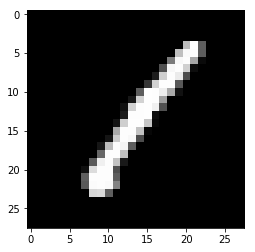

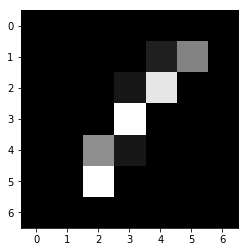

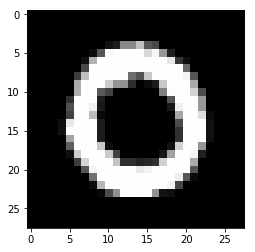

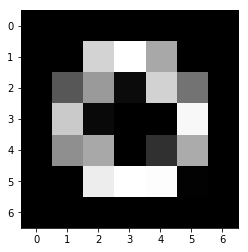

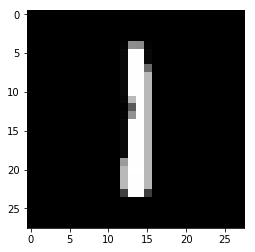

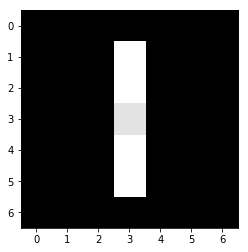

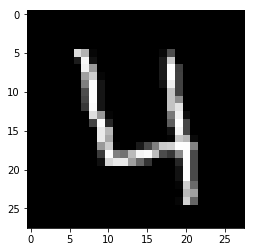

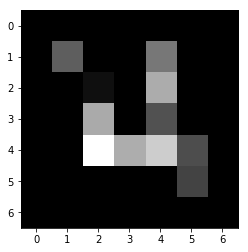

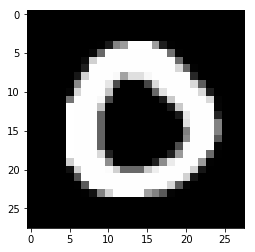

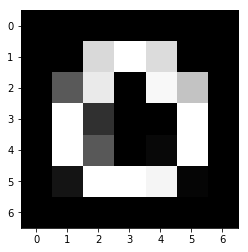

In [93]:
for i in range(5):
    plt.imshow(data[i][1:].reshape((28,28)), cmap='gray')
    plt.show()
    plt.imshow(x[i].reshape((7,7)), cmap='gray')
    plt.show()

In [95]:
for train_size in [5000,10000,15000,20000,25000,30000,35000]:

    x_train=x_rand[:train_size]
    x_test=x_rand[-7000:]
    y_train=y_rand[:train_size]
    y_test=y_rand[-7000:]
    
    l2=keras.regularizers.l2(0.001)
    l2=None
    dnn=Sequential()
    dnn.add(layers.Dense(units=300,input_dim=49,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=100,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=10,activation='softmax',kernel_regularizer=l2))

    dnn.compile(loss=loss,optimizer=sgd,metrics=['accuracy'])

    dnn.fit(x_train,y_train,epochs=100,verbose=2,batch_size=batch_size)
    
    df.loc[(train_size,16),:]=[1-dnn.evaluate(x_train, y_train, batch_size=32)[1],1-dnn.evaluate(x_test, y_test, batch_size=32)[1]]

Epoch 1/100
 - 2s - loss: 2.3069 - acc: 0.1094
Epoch 2/100
 - 0s - loss: 2.2923 - acc: 0.1560
Epoch 3/100
 - 0s - loss: 2.2780 - acc: 0.2106
Epoch 4/100
 - 0s - loss: 2.2639 - acc: 0.2576
Epoch 5/100
 - 0s - loss: 2.2500 - acc: 0.2860
Epoch 6/100
 - 0s - loss: 2.2361 - acc: 0.3114
Epoch 7/100
 - 0s - loss: 2.2222 - acc: 0.3360
Epoch 8/100
 - 0s - loss: 2.2083 - acc: 0.3578
Epoch 9/100
 - 0s - loss: 2.1944 - acc: 0.3846
Epoch 10/100
 - 0s - loss: 2.1803 - acc: 0.4078
Epoch 11/100
 - 0s - loss: 2.1661 - acc: 0.4364
Epoch 12/100
 - 0s - loss: 2.1516 - acc: 0.4650
Epoch 13/100
 - 0s - loss: 2.1368 - acc: 0.4898
Epoch 14/100
 - 0s - loss: 2.1217 - acc: 0.5102
Epoch 15/100
 - 0s - loss: 2.1062 - acc: 0.5262
Epoch 16/100
 - 0s - loss: 2.0902 - acc: 0.5400
Epoch 17/100
 - 0s - loss: 2.0738 - acc: 0.5486
Epoch 18/100
 - 0s - loss: 2.0569 - acc: 0.5582
Epoch 19/100
 - 0s - loss: 2.0395 - acc: 0.5658
Epoch 20/100
 - 0s - loss: 2.0216 - acc: 0.5698
Epoch 21/100
 - 0s - loss: 2.0031 - acc: 0.5744
E

Epoch 70/100
 - 1s - loss: 0.7519 - acc: 0.7724
Epoch 71/100
 - 1s - loss: 0.7481 - acc: 0.7739
Epoch 72/100
 - 1s - loss: 0.7446 - acc: 0.7740
Epoch 73/100
 - 1s - loss: 0.7411 - acc: 0.7742
Epoch 74/100
 - 1s - loss: 0.7377 - acc: 0.7758
Epoch 75/100
 - 1s - loss: 0.7345 - acc: 0.7761
Epoch 76/100
 - 1s - loss: 0.7312 - acc: 0.7771
Epoch 77/100
 - 1s - loss: 0.7281 - acc: 0.7785
Epoch 78/100
 - 1s - loss: 0.7252 - acc: 0.7793
Epoch 79/100
 - 1s - loss: 0.7223 - acc: 0.7789
Epoch 80/100
 - 1s - loss: 0.7194 - acc: 0.7810
Epoch 81/100
 - 1s - loss: 0.7166 - acc: 0.7816
Epoch 82/100
 - 1s - loss: 0.7139 - acc: 0.7829
Epoch 83/100
 - 1s - loss: 0.7113 - acc: 0.7819
Epoch 84/100
 - 1s - loss: 0.7087 - acc: 0.7830
Epoch 85/100
 - 1s - loss: 0.7063 - acc: 0.7834
Epoch 86/100
 - 1s - loss: 0.7038 - acc: 0.7851
Epoch 87/100
 - 1s - loss: 0.7015 - acc: 0.7850
Epoch 88/100
 - 1s - loss: 0.6991 - acc: 0.7865
Epoch 89/100
 - 1s - loss: 0.6969 - acc: 0.7862
Epoch 90/100
 - 1s - loss: 0.6946 - acc:

 - 2s - loss: 0.7361 - acc: 0.7759
Epoch 37/100
 - 2s - loss: 0.7294 - acc: 0.7778
Epoch 38/100
 - 2s - loss: 0.7230 - acc: 0.7796
Epoch 39/100
 - 2s - loss: 0.7172 - acc: 0.7803
Epoch 40/100
 - 2s - loss: 0.7115 - acc: 0.7824
Epoch 41/100
 - 2s - loss: 0.7062 - acc: 0.7832
Epoch 42/100
 - 2s - loss: 0.7012 - acc: 0.7841
Epoch 43/100
 - 2s - loss: 0.6964 - acc: 0.7855
Epoch 44/100
 - 2s - loss: 0.6918 - acc: 0.7873
Epoch 45/100
 - 2s - loss: 0.6875 - acc: 0.7885
Epoch 46/100
 - 2s - loss: 0.6834 - acc: 0.7890
Epoch 47/100
 - 2s - loss: 0.6794 - acc: 0.7907
Epoch 48/100
 - 2s - loss: 0.6756 - acc: 0.7915
Epoch 49/100
 - 2s - loss: 0.6719 - acc: 0.7921
Epoch 50/100
 - 2s - loss: 0.6686 - acc: 0.7934
Epoch 51/100
 - 2s - loss: 0.6651 - acc: 0.7940
Epoch 52/100
 - 2s - loss: 0.6620 - acc: 0.7944
Epoch 53/100
 - 2s - loss: 0.6588 - acc: 0.7960
Epoch 54/100
 - 2s - loss: 0.6557 - acc: 0.7962
Epoch 55/100
 - 2s - loss: 0.6528 - acc: 0.7974
Epoch 56/100
 - 2s - loss: 0.6500 - acc: 0.7985
Epoch

 - 3s - loss: 2.1695 - acc: 0.4114
Epoch 3/100
 - 2s - loss: 2.0784 - acc: 0.5396
Epoch 4/100
 - 3s - loss: 1.9747 - acc: 0.5872
Epoch 5/100
 - 4s - loss: 1.8543 - acc: 0.6160
Epoch 6/100
 - 3s - loss: 1.7190 - acc: 0.6399
Epoch 7/100
 - 2s - loss: 1.5771 - acc: 0.6566
Epoch 8/100
 - 3s - loss: 1.4395 - acc: 0.6775
Epoch 9/100
 - 3s - loss: 1.3155 - acc: 0.6956
Epoch 10/100
 - 3s - loss: 1.2100 - acc: 0.7074
Epoch 11/100
 - 2s - loss: 1.1231 - acc: 0.7183
Epoch 12/100
 - 3s - loss: 1.0524 - acc: 0.7280
Epoch 13/100
 - 2s - loss: 0.9948 - acc: 0.7337
Epoch 14/100
 - 3s - loss: 0.9482 - acc: 0.7387
Epoch 15/100
 - 2s - loss: 0.9096 - acc: 0.7431
Epoch 16/100
 - 3s - loss: 0.8776 - acc: 0.7481
Epoch 17/100
 - 2s - loss: 0.8507 - acc: 0.7516
Epoch 18/100
 - 2s - loss: 0.8277 - acc: 0.7552
Epoch 19/100
 - 2s - loss: 0.8080 - acc: 0.7578
Epoch 20/100
 - 2s - loss: 0.7910 - acc: 0.7611
Epoch 21/100
 - 2s - loss: 0.7761 - acc: 0.7640
Epoch 22/100
 - 3s - loss: 0.7629 - acc: 0.7675
Epoch 23/100

Epoch 71/100
 - 5s - loss: 0.5418 - acc: 0.8312
Epoch 72/100
 - 5s - loss: 0.5395 - acc: 0.8316
Epoch 73/100
 - 5s - loss: 0.5373 - acc: 0.8325
Epoch 74/100
 - 5s - loss: 0.5352 - acc: 0.8333
Epoch 75/100
 - 7s - loss: 0.5330 - acc: 0.8336
Epoch 76/100
 - 7s - loss: 0.5308 - acc: 0.8347
Epoch 77/100
 - 4s - loss: 0.5287 - acc: 0.8353
Epoch 78/100
 - 4s - loss: 0.5265 - acc: 0.8357
Epoch 79/100
 - 4s - loss: 0.5244 - acc: 0.8362
Epoch 80/100
 - 4s - loss: 0.5223 - acc: 0.8370
Epoch 81/100
 - 4s - loss: 0.5203 - acc: 0.8369
Epoch 82/100
 - 4s - loss: 0.5182 - acc: 0.8384
Epoch 83/100
 - 4s - loss: 0.5161 - acc: 0.8393
Epoch 84/100
 - 4s - loss: 0.5142 - acc: 0.8390
Epoch 85/100
 - 4s - loss: 0.5122 - acc: 0.8396
Epoch 86/100
 - 4s - loss: 0.5101 - acc: 0.8404
Epoch 87/100
 - 4s - loss: 0.5083 - acc: 0.8417
Epoch 88/100
 - 4s - loss: 0.5064 - acc: 0.8415
Epoch 89/100
 - 4s - loss: 0.5045 - acc: 0.8423
Epoch 90/100
 - 4s - loss: 0.5026 - acc: 0.8432
Epoch 91/100
 - 5s - loss: 0.5006 - acc:

In [97]:
df

,,E_in,E_out
Training size,Pixel reduction factor,,
5000,1,0.0036,0.0634286
10000,1,0.0147,0.0464286
15000,1,0.0196,0.0415714
20000,1,0.02045,0.037
25000,1,0.02108,0.0362857
30000,1,0.0219667,0.0348571
35000,1,0.0219143,0.0354286
5000,4,0.1186,0.138714
10000,4,0.108,0.121


In [116]:
df[df.index.get_level_values('Pixel reduction factor').isin([1])]['E_out'].values.tolist()

[0.06342857142857139,
 0.046428571428571375,
 0.04157142857142859,
 0.03700000000000003,
 0.036285714285714255,
 0.03485714285714281,
 0.035428571428571476]

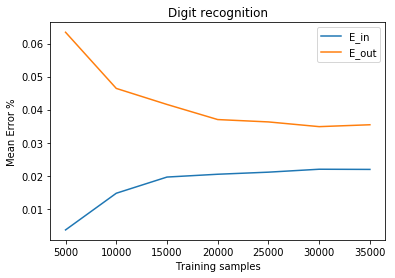

In [136]:
#usando as imagens originais

n=[e[0] for e in (df[df.index.get_level_values('Pixel reduction factor').isin([1])].index)]
e_in=df[df.index.get_level_values('Pixel reduction factor').isin([1])]['E_in'].values.tolist()
e_out=df[df.index.get_level_values('Pixel reduction factor').isin([1])]['E_out'].values.tolist()
plt.plot(n,e_in)
plt.plot(n,e_out)
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Digit recognition')
plt.legend(['E_in', 'E_out'], loc='upper right')
plt.show()

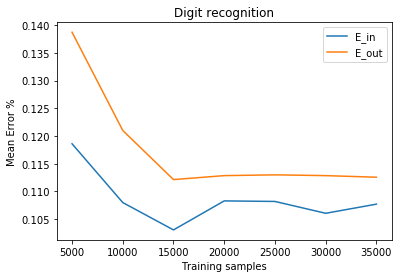

In [135]:
#usando as imagens com 1/4 dos pixels

n=[e[0] for e in (df[df.index.get_level_values('Pixel reduction factor').isin([4])].index)]
e_in=df[df.index.get_level_values('Pixel reduction factor').isin([4])]['E_in'].values.tolist()
e_out=df[df.index.get_level_values('Pixel reduction factor').isin([4])]['E_out'].values.tolist()
plt.plot(n,e_in)
plt.plot(n,e_out)
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Digit recognition')
plt.legend(['E_in', 'E_out'], loc='upper right')
plt.show()

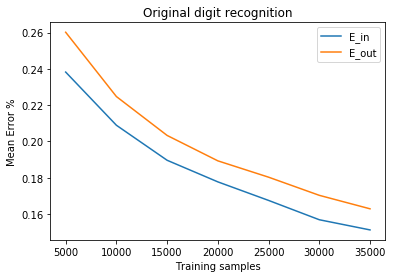

In [134]:
#usando as imagens com 1/16 dos pixels

n=[e[0] for e in (df[df.index.get_level_values('Pixel reduction factor').isin([16])].index)]
e_in=df[df.index.get_level_values('Pixel reduction factor').isin([16])]['E_in'].values.tolist()
e_out=df[df.index.get_level_values('Pixel reduction factor').isin([16])]['E_out'].values.tolist()
plt.plot(n,e_in)
plt.plot(n,e_out)
plt.ylabel('Mean Error %')
plt.xlabel('Training samples')
plt.title('Original digit recognition')
plt.legend(['E_in', 'E_out'], loc='upper right')
plt.show()

In [162]:
epsilon={}
epsilon[1]=df.loc[(35000,1),'E_out']-df.loc[(35000,1),'E_in']
epsilon[4]=df.loc[(35000,4),'E_out']-df.loc[(35000,4),'E_in']
epsilon[16]=df.loc[(35000,16),'E_out']-df.loc[(35000,16),'E_in']

In [163]:
epsilon

{1: 0.013514285714285812, 4: 0.004857142775399281, 16: 0.011628571360451923}

In [149]:
errors=[]
for i in range(10):
    x=np.array([np.array(sample[1:]) for sample in data])
    y=to_categorical(np.array([sample[0] for sample in data]),num_classes=10)

    x_rand, y_rand = shuffle(x, y)

    x_train=x_rand[:35000]
    x_test=x_rand[-7000:]
    y_train=y_rand[:35000]
    y_test=y_rand[-7000:]

    l2=keras.regularizers.l2(0.1)
    sgd=keras.optimizers.SGD(lr=0.001)

    dnn=Sequential()
    dnn.add(layers.Dense(units=300,input_dim=784,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=100,activation='relu',kernel_regularizer=l2))
    dnn.add(layers.Dense(units=10,activation='softmax',kernel_regularizer=l2))

    dnn.compile(loss=loss,optimizer=sgd,metrics=['accuracy'])

    dnn.fit(x_train,y_train,epochs=50,verbose=2,batch_size=batch_size)
    errors.append([1-dnn.evaluate(x_train, y_train, batch_size=32)[1],1-dnn.evaluate(x_test, y_test, batch_size=32)[1]])

Epoch 1/20
 - 5s - loss: 66.4465 - acc: 0.4643
Epoch 2/20
 - 4s - loss: 59.6032 - acc: 0.6471
Epoch 3/20
 - 3s - loss: 54.8323 - acc: 0.7183
Epoch 4/20
 - 4s - loss: 51.1897 - acc: 0.7332
Epoch 5/20
 - 3s - loss: 47.8552 - acc: 0.7431
Epoch 6/20
 - 3s - loss: 43.8436 - acc: 0.7994
Epoch 7/20
 - 4s - loss: 40.5755 - acc: 0.8303
Epoch 8/20
 - 4s - loss: 37.8589 - acc: 0.8403
Epoch 9/20
 - 3s - loss: 35.3483 - acc: 0.8477
Epoch 10/20
 - 4s - loss: 33.0285 - acc: 0.8520
Epoch 11/20
 - 4s - loss: 30.8751 - acc: 0.8568
Epoch 12/20
 - 4s - loss: 28.8808 - acc: 0.8597
Epoch 13/20
 - 4s - loss: 27.0248 - acc: 0.8633
Epoch 14/20
 - 4s - loss: 25.2993 - acc: 0.8668
Epoch 15/20
 - 3s - loss: 23.1576 - acc: 0.8938
Epoch 16/20
 - 3s - loss: 20.4444 - acc: 0.9683
Epoch 17/20
 - 3s - loss: 19.0285 - acc: 0.9747
Epoch 18/20
 - 3s - loss: 17.7224 - acc: 0.9789
Epoch 19/20
 - 3s - loss: 16.5134 - acc: 0.9810
Epoch 20/20
 - 3s - loss: 15.3917 - acc: 0.9832
7000/7000 [==============================] - 1s 1

Epoch 16/20
 - 4s - loss: 20.4329 - acc: 0.9784
Epoch 17/20
 - 4s - loss: 19.0368 - acc: 0.9806
Epoch 18/20
 - 4s - loss: 17.7394 - acc: 0.9826
Epoch 19/20
 - 3s - loss: 16.5334 - acc: 0.9839
Epoch 20/20
 - 3s - loss: 15.4120 - acc: 0.9854
7000/7000 [==============================] - 1s 122us/step
Epoch 1/20
 - 5s - loss: 63.7986 - acc: 0.6146
Epoch 2/20
 - 3s - loss: 55.8250 - acc: 0.8705
Epoch 3/20
 - 3s - loss: 51.6710 - acc: 0.9026
Epoch 4/20
 - 3s - loss: 47.9796 - acc: 0.9213
Epoch 5/20
 - 3s - loss: 44.6152 - acc: 0.9327
Epoch 6/20
 - 3s - loss: 41.4981 - acc: 0.9427
Epoch 7/20
 - 3s - loss: 38.6069 - acc: 0.9499
Epoch 8/20
 - 3s - loss: 35.9332 - acc: 0.9559
Epoch 9/20
 - 4s - loss: 33.4528 - acc: 0.9603
Epoch 10/20
 - 4s - loss: 31.1509 - acc: 0.9643
Epoch 11/20
 - 3s - loss: 29.0086 - acc: 0.9671
Epoch 12/20
 - 3s - loss: 27.0160 - acc: 0.9701
Epoch 13/20
 - 3s - loss: 25.1609 - acc: 0.9736
Epoch 14/20
 - 3s - loss: 23.4353 - acc: 0.9761
Epoch 15/20
 - 4s - loss: 21.8306 - ac

In [147]:
x_train=x_rand[:35000]
x_test=x_rand[-7000:]
y_train=y_rand[:35000]
y_test=y_rand[-7000:]

l2=keras.regularizers.l2(0.1)
sgd=keras.optimizers.SGD(lr=0.01)

dnn=Sequential()
dnn.add(layers.Dense(units=300,input_dim=784,activation='relu',kernel_regularizer=l2))
dnn.add(layers.Dense(units=100,activation='relu',kernel_regularizer=l2))
dnn.add(layers.Dense(units=10,activation='softmax',kernel_regularizer=l2))

dnn.compile(loss=loss,optimizer=sgd,metrics=['accuracy'])

dnn.fit(x_train,y_train,epochs=20,verbose=2,batch_size=200)

Epoch 1/50
 - 7s - loss: 45.1703 - acc: 0.1946
Epoch 2/50
 - 5s - loss: 8.4516 - acc: 0.9221
Epoch 3/50
 - 5s - loss: 2.3469 - acc: 0.9485
Epoch 4/50
 - 5s - loss: 0.8892 - acc: 0.9467
Epoch 5/50
 - 5s - loss: 0.5265 - acc: 0.9501
Epoch 6/50
 - 5s - loss: 0.4276 - acc: 0.9531
Epoch 7/50
 - 5s - loss: 0.4036 - acc: 0.9528
Epoch 8/50
 - 5s - loss: 0.4025 - acc: 0.9531
Epoch 9/50
 - 6s - loss: 0.3989 - acc: 0.9529
Epoch 10/50
 - 6s - loss: 0.3849 - acc: 0.9577
Epoch 11/50
 - 5s - loss: 0.3883 - acc: 0.9563
Epoch 12/50
 - 5s - loss: 0.3909 - acc: 0.9557
Epoch 13/50


KeyboardInterrupt: 

In [196]:
errors

[[0.01911428572790963, 0.03171428578240533],
 [0.01674285714285717, 0.032142857142857154],
 [0.028514285714285714, 0.0355714285714286],
 [0.01774285714285717, 0.036714285782405334],
 [0.017285714272090358, 0.030285714353833888],
 [0.018228571428571483, 0.03200000006811955],
 [0.019371428571428595, 0.03271428578240533],
 [0.018199999999999994, 0.033142857210976776],
 [0.015828571428571414, 0.03057142863954811],
 [0.019857142857142907, 0.030142857074737534]]

In [197]:
eps=[error[1]-error[0] for error in errors]

In [198]:
eps

[0.0126000000544957,
 0.015399999999999983,
 0.007057142857142887,
 0.018971428639548163,
 0.01300000008174353,
 0.01377142863954807,
 0.013342857210976736,
 0.014942857210976782,
 0.014742857210976696,
 0.010285714217594628]

In [200]:
1-len([e for e in eps if e<epsilon[1]])/10

0.5

In [ ]:
#Considerando epsilon=0.013514285714285812 e
#rodando o modelo 10 vezes com diferentes subconjuntos de treinos (n=35000) e teste (n=7000),
#o valor de delta estimado é 0.5

In [ ]:
#Nota-se que, ao reduzir a qualidade das imagens,
#a capacidade de aprendizagem pela rede neural cai,
#pois foi perdida parte da informação

# Questão 2

O método de aprendizado adotado na questão anterior inclui regularização? Caso afirmativo, como? Caso negativo, como formularia a inclusão da regularização e porque esse procedimento melhoraria o resultado?

In [ ]:
#Sim, inclui regularização.

#Foi utilizada a regularização l2 em todas as camadas das redes neurais.

#Ao treinar a rede neural para as imagens que não sofreram redução de pixels,

#foi utilizada uma regularização maior, dado o maior número de parâmetros livres.

#Essa prática ajuda a reduzir overfitting.